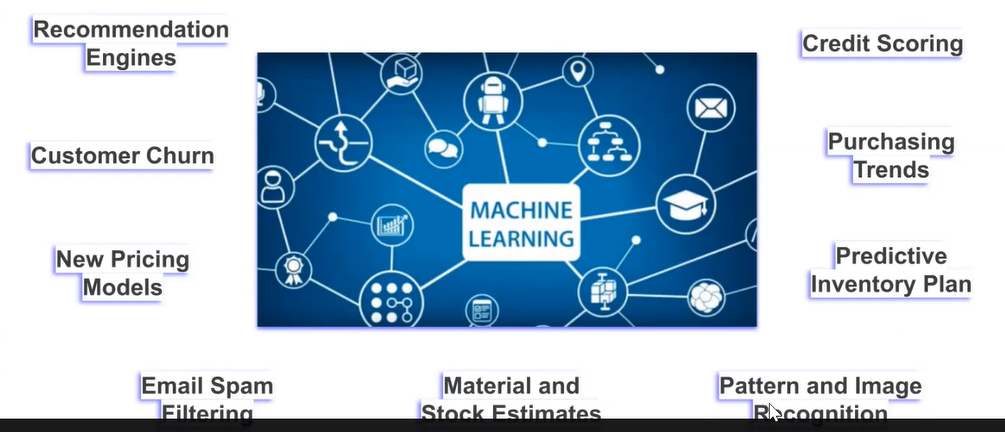
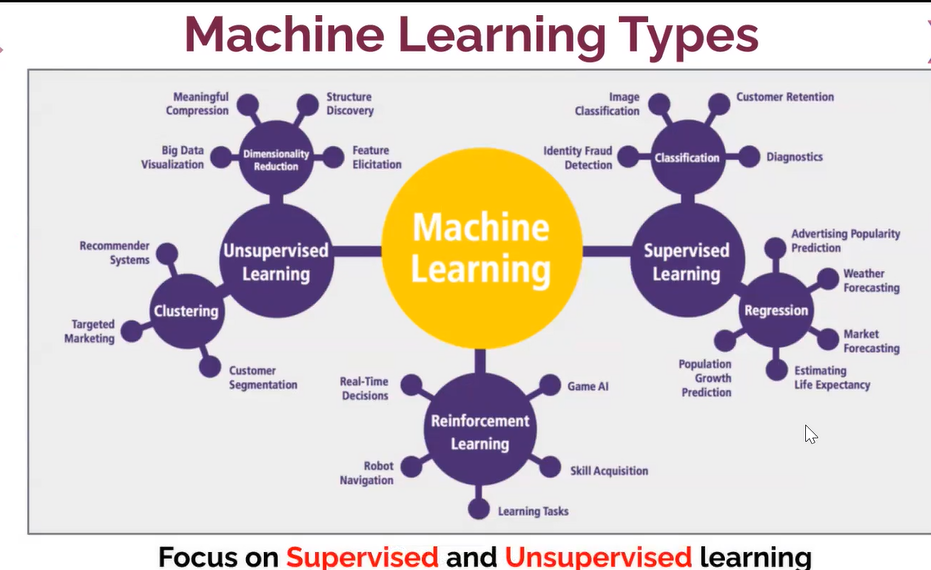

# Simple Linear Regression - Supervised Model

https://www.linkedin.com/pulse/parametric-non-parametric-methods-satya-mishra/


*A learning model that summarizes data with a set of parameters of fixed size (independent of the number of training examples) is called a parametric model. No matter how much data you throw at a parametric model, it won’t change its mind about how many parameters it needs.*

— Artificial Intelligence: A Modern Approach, page 737 <br>
https://machinelearningmastery.com/parametric-and-nonparametric-machine-learning-algorithms/

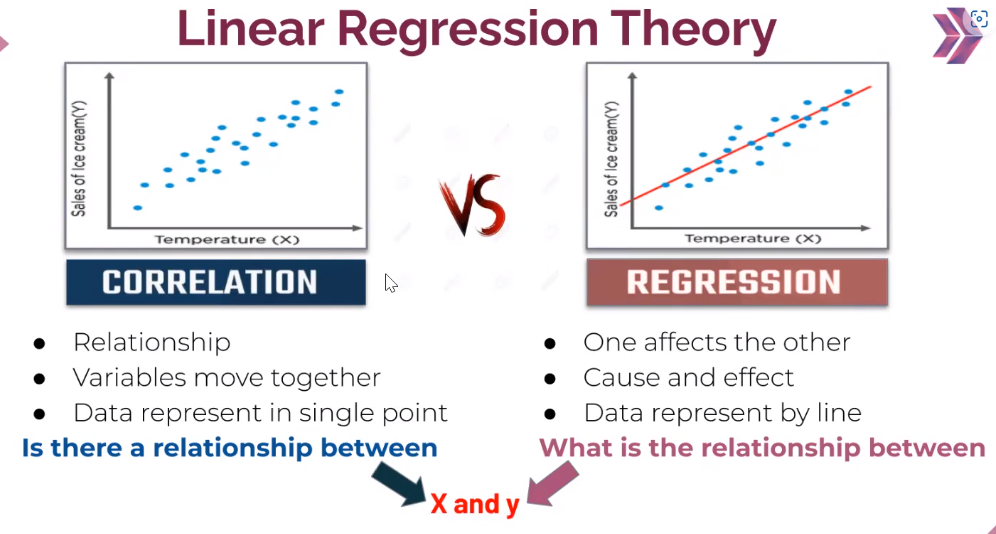
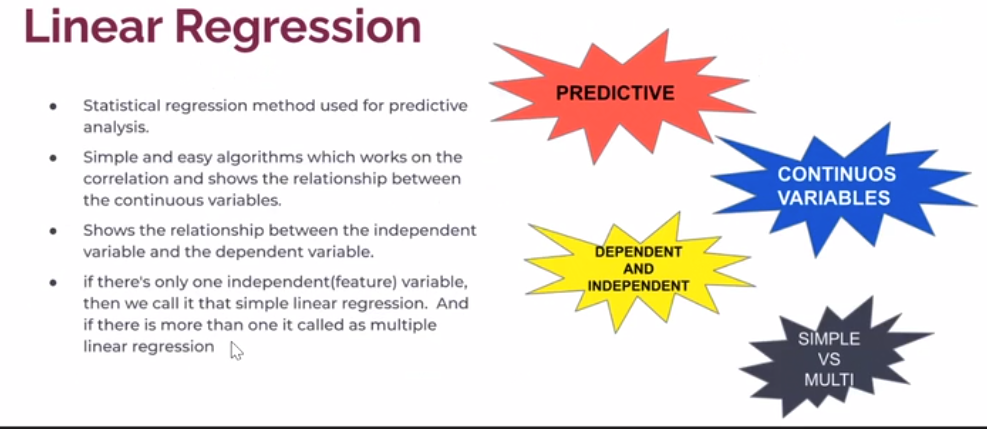
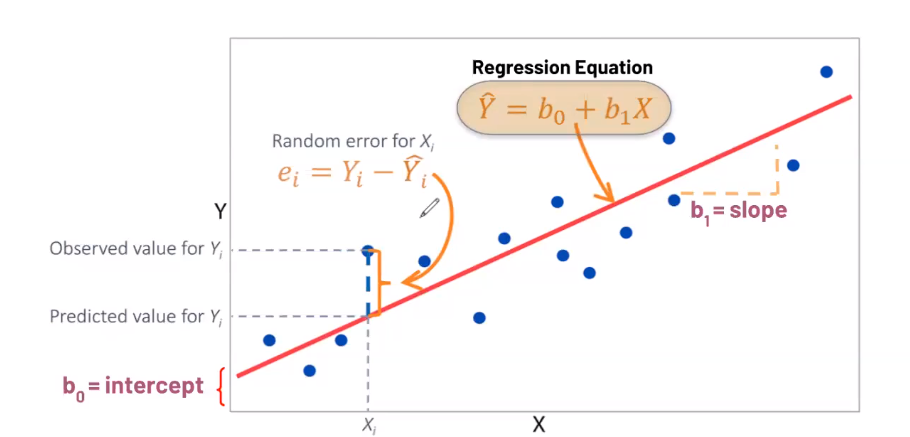
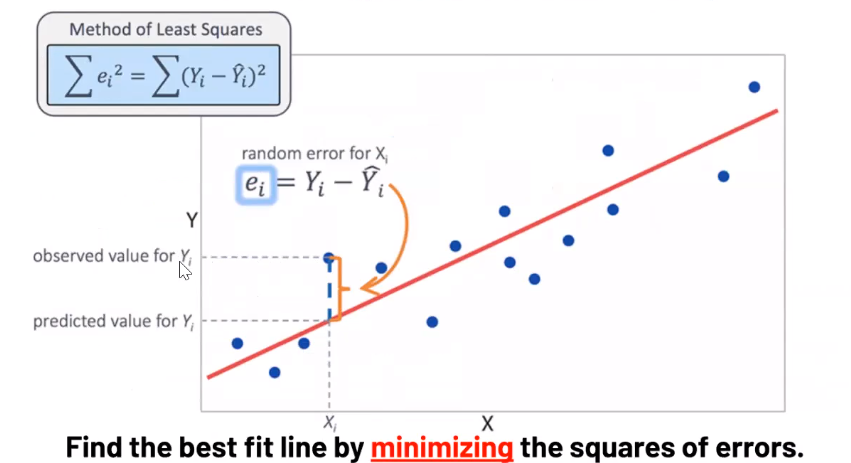
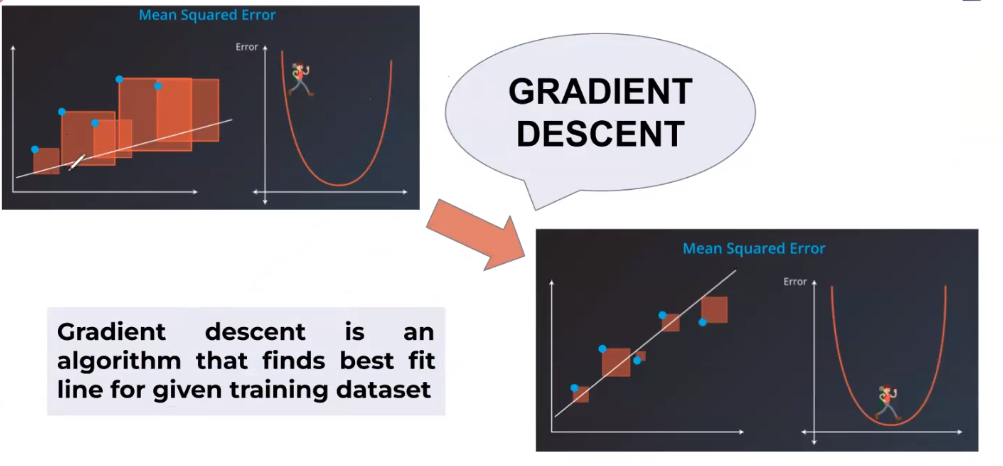
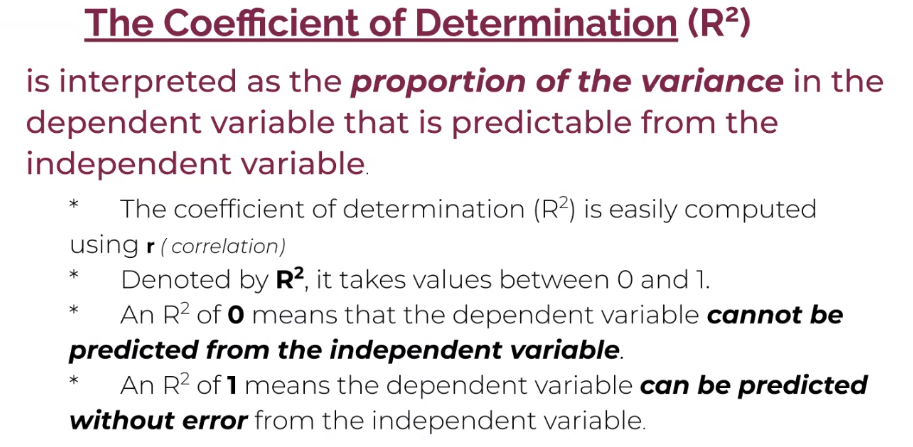

## Import Library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams["figure.figsize"] = (10,6)  # standardizes the dimensions of shapes
import warnings
warnings.filterwarnings('ignore')

## Read Dataset

In [41]:
df = pd.read_csv("Advertising.csv")
df

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


independent variable = feature = estimator = attribute = input

dependent variable   = target  = label     = output

rows = observation, sample

**features** = TV, radio, newspaper

**target** = sales

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   radio      200 non-null    float64
 2   newspaper  200 non-null    float64
 3   sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [43]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
TV,200.0,147.0425,85.854236,0.7,74.375,149.75,218.825,296.4
radio,200.0,23.2640,14.846809,0.0,9.975,22.90,36.525,49.6
newspaper,200.0,30.5540,21.778621,0.3,12.750,25.75,45.100,114.0
sales,200.0,14.0225,5.217457,1.6,10.375,12.90,17.400,27.0


> If std is greater than mean, we can say that there is an outlier danger in the dataframe.

## Create new independent variable (feature)

In [44]:
# feature engineering: How much does the total spend on advertising increase sales?

df.insert(3, "total_spend", df["TV"] + df["radio"] + df["newspaper"])

In [45]:
df

,TV,radio,newspaper,total_spend,sales
0,230.1,37.8,69.2,337.1,22.1
1,44.5,39.3,45.1,128.9,10.4
2,17.2,45.9,69.3,132.4,9.3
3,151.5,41.3,58.5,251.3,18.5
4,180.8,10.8,58.4,250.0,12.9
...,...,...,...,...,...
195,38.2,3.7,13.8,55.7,7.6
196,94.2,4.9,8.1,107.2,9.7
197,177.0,9.3,6.4,192.7,12.8
198,283.6,42.0,66.2,391.8,25.5


In [46]:
# df["total_spend"] = df["TV"] + df["radio"] + df["newspaper"]  
# df = df.iloc[:,[0,1,2,4,3]]  # We take the target column to the end.
# df.head()

In [47]:
# Provides an overview of the data
sns.pairplot(df);

> We can say that there is a stronger and more positive relationship between TV and sales. In addition, it seems that there is a stronger and more positive relationship between total_spend and sales. The first assumption of linear regression is that there is a strong correlation, that is, a strong linear relationship. Then we can express them with a linear line.

## Which feature is more suitable for linear regression?

In [48]:
# Compute pairwise correlation of columns, excluding NA/null values.
df.corr() 

,TV,radio,newspaper,total_spend,sales
TV,1.000000,0.054809,0.056648,0.945330,0.782224
radio,0.054809,1.000000,0.354104,0.293211,0.576223
newspaper,0.056648,0.354104,1.000000,0.343059,0.228299
total_spend,0.945330,0.293211,0.343059,1.000000,0.867712
sales,0.782224,0.576223,0.228299,0.867712,1.000000


In [49]:
df["sales"].corr(df["TV"])  # df['A'].corr(df['B'])

0.7822244248616066

In [50]:
for i in df.drop(columns ="sales"):
    print(f"corr between sales and {i:<12}:  {df.sales.corr(df[i])}")

corr between sales and TV          :  0.7822244248616066
corr between sales and radio       :  0.5762225745710552
corr between sales and newspaper   :  0.22829902637616534
corr between sales and total_spend :  0.8677123027017418


> Since the highest correlation is between sales and total_spend, we can express the relationship between these two features with the best fit line. We did feature engineering to use simple regression.

In [51]:
sns.heatmap(df.corr(), annot=True);

In [52]:
df = df[["total_spend", "sales"]]
df

,total_spend,sales
0,337.1,22.1
1,128.9,10.4
2,132.4,9.3
3,251.3,18.5
4,250.0,12.9
...,...,...
195,55.7,7.6
196,107.2,9.7
197,192.7,12.8
198,391.8,25.5


## Plotting the relationship between independent variable and dependent variable 

In [53]:
sns.scatterplot(x ="total_spend", y = "sales", data=df);

In [54]:
sns.regplot(x ="total_spend", y = "sales", data=df);

## Correlation between independent variable and dependent variable

In [55]:
corr = df["sales"].corr(df["total_spend"])
corr

0.8677123027017418

In [56]:
df["total_spend"].corr(df["sales"])

0.8677123027017419

## Coefficient of determination (R^2)

To what extent does the independent variable x explain the dependent variable y?
> This metric tells us how successful our model is. It ranges from 0 to 1. 
It answers the question to what extent does the variable x explain the variable y in the line y = ax + b.

In [57]:
# A special case for simple regression.

R2_score = corr**2  
R2_score


0.7529246402599592

> x independent variable explains y dependent variable 75% of the time. In other words, the total_spend variable explains the sales target feature by 75%. Therefore, there are 25% more different factors (properties).

A house price ----> 50.000 USD

B house price ----> 60.000 USD

> There is a difference of 10,000 USD between these two houses. Why does this difference arise?

A house ----> 2+1

B house ----> 3+1

If 3,000 USD of the variation in house prices is due to the number of rooms in the houses, what is the Coefficient of determination (R2) of the number of rooms?

### R2_score for the number of rooms in the houses

r2_score = 3000 / (60000-50000)

r2_score = 0.3

> Let's say that $ 3000 of the difference of 10000 dollars is due to the number of rooms. In this case, r2_score = 3000/10000 and 30% of this difference can be explained by the number of rooms. There may be different features affecting 70% of them. Therefore, we can say that our model is successful at 30%. Let's not forget that this rate is a low rate, it is necessary to strengthen the accuracy r2_score of the model by examining other factors.

> For this data, we can explain only 3 thousand dollars, or 30% of the 10 thousand dollars difference, with the number of rooms.
> It is known that the number of rooms affects house prices by around 3000 dollars.

## Linear Regression

In [58]:
sns.regplot(x="total_spend", y="sales", data=df, ci=None);

> The Gradient Descent algorithm in Linear Regression draws the best fit line by minimizing the error with the Least Square method.

## Splitting the dataset into X (independent variables) and y (dependent variable)

In [59]:
# y_pred = b1X + b0  # b1 is slope, b0 is intercept

In [60]:
X= df["total_spend"]  # feature
y= df["sales"]  # target

## Determination of coefficients (slope and intercept)

In [61]:
np.polyfit(X, y, deg=1)  # Least squares polynomial fit. Compute b1 and b0

array([0.04868788, 4.24302822])

In [73]:
slope, intercept = np.polyfit(X, y, deg=1)
slope, intercept 

(0.048687879319048145, 4.2430282160363255)

In [74]:
print("slope    :", slope)
print("intercept:", intercept)

slope    : 0.048687879319048145
intercept: 4.2430282160363255


In [75]:
print(f"y = {slope}X + {intercept}")  # line equation, X= df["total_spend"]  # feature

y = 0.048687879319048145X + 4.2430282160363255


## Why do we use the least squares error method to find the regression line that best fits the data?

In [65]:
b1, b0 = np.polyfit(X, y, deg=1)

In [66]:
print("b1 :", b1)
print("b0 :", b0)

b1 : 0.048687879319048145
b0 : 4.2430282160363255


In [67]:
y_pred = b1*X + b0

In [68]:
values = {"actual": y, "predicted": y_pred, "residual":y-y_pred, "LSE": (y-y_pred)**2}
df_2 = pd.DataFrame(values)
df_2

,actual,predicted,residual,LSE
0,22.1,20.655712,1.444288,2.085967
1,10.4,10.518896,-0.118896,0.014136
2,9.3,10.689303,-1.389303,1.930164
3,18.5,16.478292,2.021708,4.087302
4,12.9,16.414998,-3.514998,12.355211
...,...,...,...,...
195,7.6,6.954943,0.645057,0.416098
196,9.7,9.462369,0.237631,0.056469
197,12.8,13.625183,-0.825183,0.680926
198,25.5,23.318939,2.181061,4.757026


In [76]:
df_2.LSE.sum()

1338.4439761715594

In [77]:
df_2.residual.sum().round() 

# due to negative values, the sum of the errors is zero, so we proceed by squaring them.
# If our data is suitable for linear regression, the sum of residuals (errors) is approximately zero.

0.0

## Prediction with simple linear regression

In [78]:
potential_spend = np.linspace(0, 500, 100)
potential_spend  # we will use this data as a feature in the model soon.

array([  0.        ,   5.05050505,  10.1010101 ,  15.15151515,
        20.2020202 ,  25.25252525,  30.3030303 ,  35.35353535,
        40.4040404 ,  45.45454545,  50.50505051,  55.55555556,
        60.60606061,  65.65656566,  70.70707071,  75.75757576,
        80.80808081,  85.85858586,  90.90909091,  95.95959596,
       101.01010101, 106.06060606, 111.11111111, 116.16161616,
       121.21212121, 126.26262626, 131.31313131, 136.36363636,
       141.41414141, 146.46464646, 151.51515152, 156.56565657,
       161.61616162, 166.66666667, 171.71717172, 176.76767677,
       181.81818182, 186.86868687, 191.91919192, 196.96969697,
       202.02020202, 207.07070707, 212.12121212, 217.17171717,
       222.22222222, 227.27272727, 232.32323232, 237.37373737,
       242.42424242, 247.47474747, 252.52525253, 257.57575758,
       262.62626263, 267.67676768, 272.72727273, 277.77777778,
       282.82828283, 287.87878788, 292.92929293, 297.97979798,
       303.03030303, 308.08080808, 313.13131313, 318.18

In [79]:
predicted_sales_lin = b1* potential_spend + b0
predicted_sales_lin  # predicted value

array([ 4.24302822,  4.4889266 ,  4.73482498,  4.98072336,  5.22662174,
        5.47252012,  5.7184185 ,  5.96431688,  6.21021526,  6.45611364,
        6.70201202,  6.9479104 ,  7.19380878,  7.43970716,  7.68560554,
        7.93150392,  8.1774023 ,  8.42330068,  8.66919906,  8.91509744,
        9.16099582,  9.4068942 ,  9.65279258,  9.89869097, 10.14458935,
       10.39048773, 10.63638611, 10.88228449, 11.12818287, 11.37408125,
       11.61997963, 11.86587801, 12.11177639, 12.35767477, 12.60357315,
       12.84947153, 13.09536991, 13.34126829, 13.58716667, 13.83306505,
       14.07896343, 14.32486181, 14.57076019, 14.81665857, 15.06255695,
       15.30845533, 15.55435371, 15.80025209, 16.04615048, 16.29204886,
       16.53794724, 16.78384562, 17.029744  , 17.27564238, 17.52154076,
       17.76743914, 18.01333752, 18.2592359 , 18.50513428, 18.75103266,
       18.99693104, 19.24282942, 19.4887278 , 19.73462618, 19.98052456,
       20.22642294, 20.47232132, 20.7182197 , 20.96411808, 21.21

In [80]:
sns.regplot(x="total_spend", y="sales", data=df, ci=None)

<AxesSubplot:xlabel='total_spend', ylabel='sales'>

In [81]:
plt.plot(potential_spend, predicted_sales_lin)